<a href="https://colab.research.google.com/github/Ganeshwalimbe/Bike-Sharing-Demand-Prediction---Capstone-Project/blob/main/Ganesh_Walimbe_Seoul_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#importing dataset 
data= pd.read_csv('/content/drive/MyDrive/AlmaBetter /Capstone projects /Ganesh Walimbe -capstone project 2-Seoul bike sharing demand prediction/SeoulBikeData.csv',encoding = 'unicode_escape')

In [12]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [13]:
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [14]:
data.shape

(8760, 14)

Seoul bike sharing dataset is containing 14 variables and total rows in the dataset is 8760.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [16]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


**cheking if there are missing values presnt in data**

In [17]:
data.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

there are zero missing values present in dataset

In [18]:
# Checking Duplicate Values
value=len(data[data.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


In [19]:
data.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [20]:
data['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [21]:
data['Solar Radiation (MJ/m2)'].value_counts()

0.00    4300
0.01     128
0.02      82
0.03      69
0.06      61
        ... 
3.38       1
2.97       1
3.44       1
3.49       1
3.45       1
Name: Solar Radiation (MJ/m2), Length: 345, dtype: int64

**Modifying date column**

In [22]:
from datetime import datetime
import datetime as dt
# Changing the "Date" column into three "year","month","day" column
data['Date'] = data['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

In [23]:
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day_name()

In [24]:
#creating a new column of 'weekend' and drop the column "Date","day","year"
data['weekend']=data['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
data=data.drop(columns=['Date','day','year'],axis=1)

In [25]:
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


# **Exploratory Data Analysis (EDA)**
Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

# Monthly rental of bikes analysis

[Text(0.5, 1.0, 'Number of Rented bikes acording to Month ')]

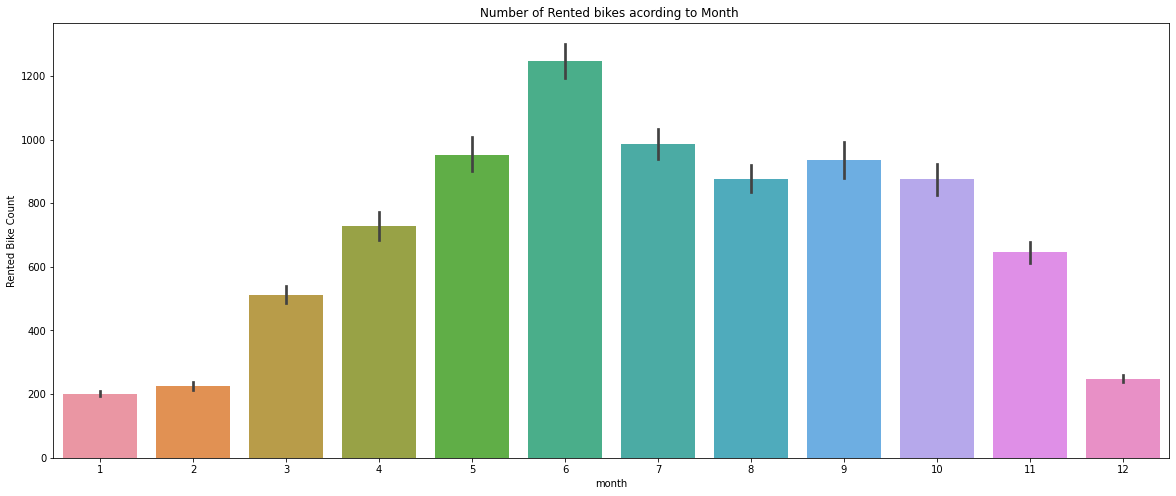

In [26]:
#plotting barplot for rented bike count v/s month
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=data,x='month',y='Rented Bike Count',ax=ax)
ax.set(title='Number of Rented bikes acording to Month ')

**From the above barplot we can see that maximum number of bikes rented in the month of June and followed by May ,july,August,september and october .**

# Weekend or not v/s rented bike count

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays and weekend ')]

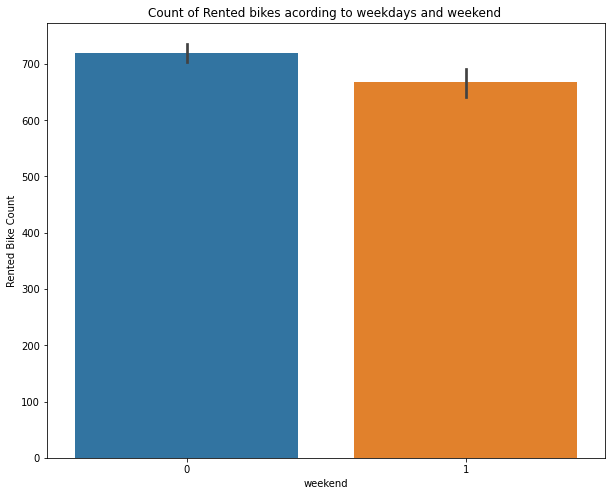

In [27]:

fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=data,x='weekend',y='Rented Bike Count',ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays and weekend ')

***From the above plot we can say that people rent bikes slightly more bikes in weekdays as compared to weekend ***

[Text(0.5, 1.0, 'Count of Rented bikes acording to each hour of the day ')]

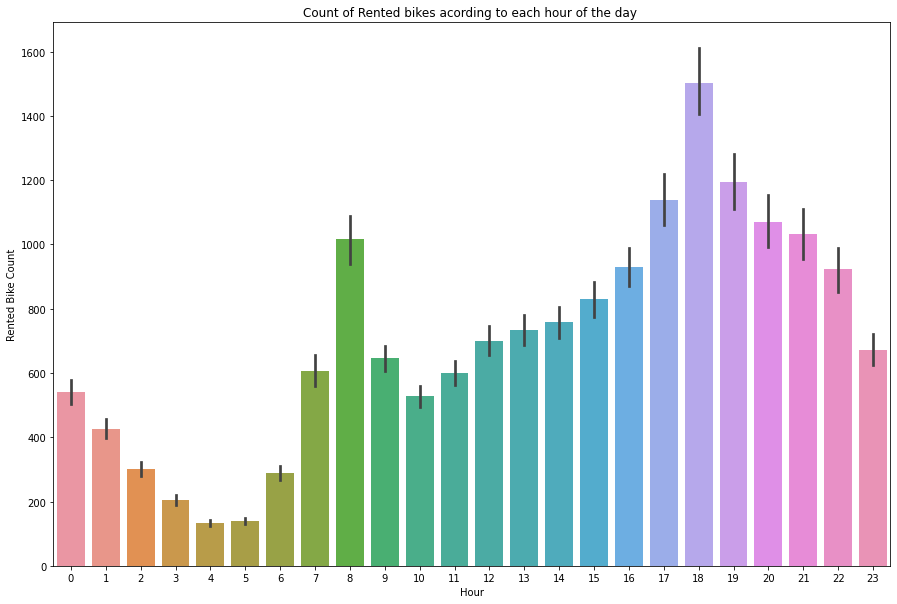

In [28]:
fig,ax=plt.subplots(figsize=(15,10))
sns.barplot(data=data,x='Hour',y='Rented Bike Count',ax=ax)
ax.set(title='Count of Rented bikes acording to each hour of the day ')

**From the above plot we can say that peak time of renting bike is at 7am to 9am in the morning and from 5pm to 10pm in the evening .**



[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

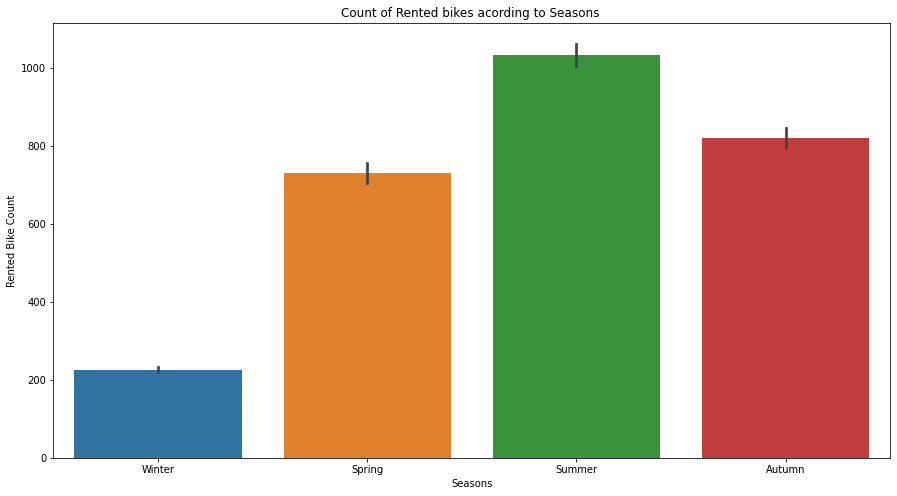

In [29]:
#plotting barplot for Count of Rented bikes acording to Seasons
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=data,x='Seasons',y='Rented Bike Count',ax=ax)
ax.set(title='Count of Rented bikes acording to Seasons ')

In the above bar plot which shows the use of rented bike in in four different 
seasons, and it clearly shows that, 

In summer season the use of rented bike is high 

In winter season the use of rented bike is very low because of snowfall. 

### Analysis of numerical variables

In [30]:
#defining numerical variables
Numerical_features=['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)','Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)','Snowfall (cm)']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

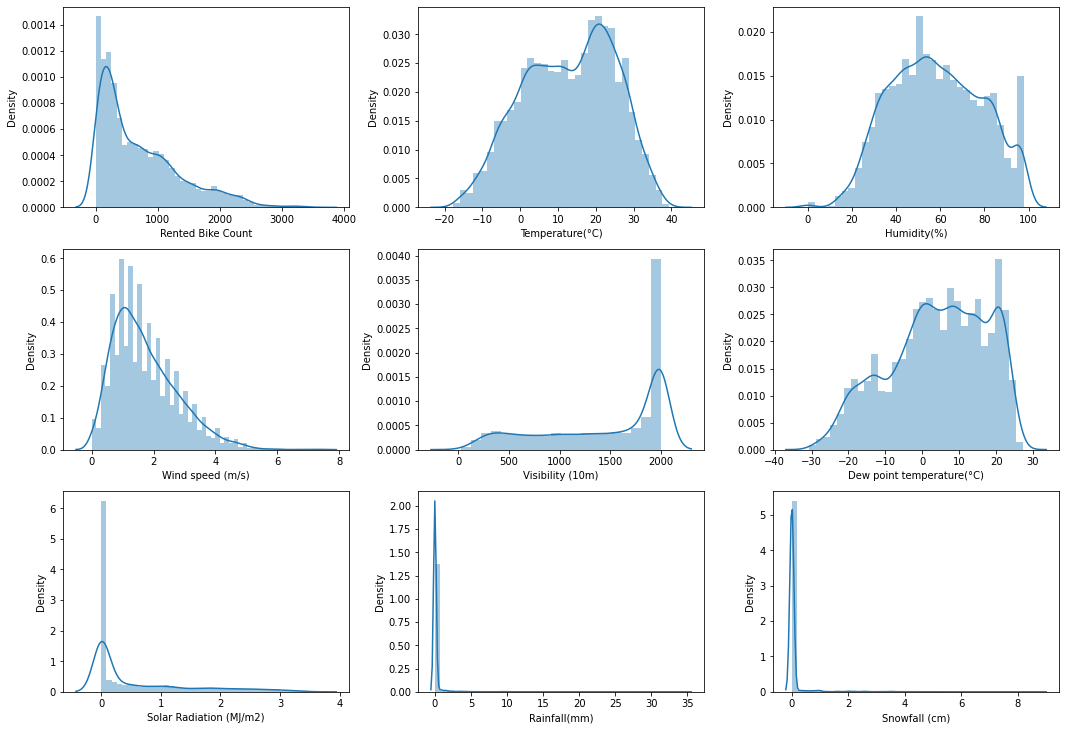

In [31]:
#plotting distribution plots of numerical variables
fig=plt.figure(figsize=(15,30))

for i in range(len(Numerical_features)):
    fig.add_subplot(9, 3, i+1)
    
    sns.distplot(data[Numerical_features[i]])
plt.tight_layout()
plt.show()

From above distribution plots we can say that,

*  Rented bike count,Wind speed,solar radiation,rainfall,snowfall are right skewed variables 
*  Visibilty,Dew point temperature are right skewed variables.
*  Temperature,Humidity and wind speed are approximately normal. 



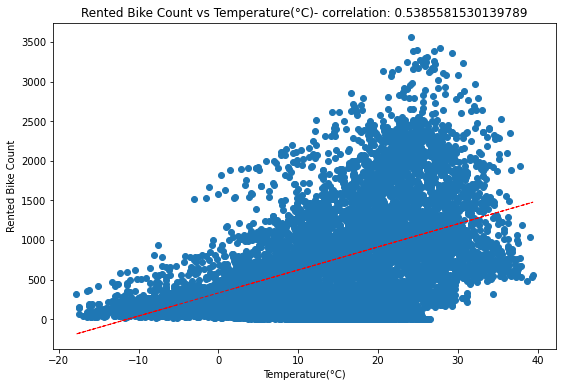

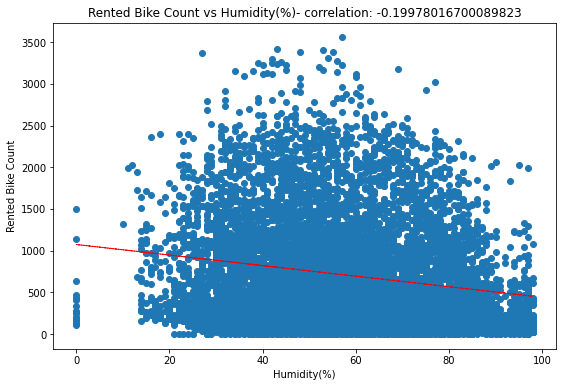

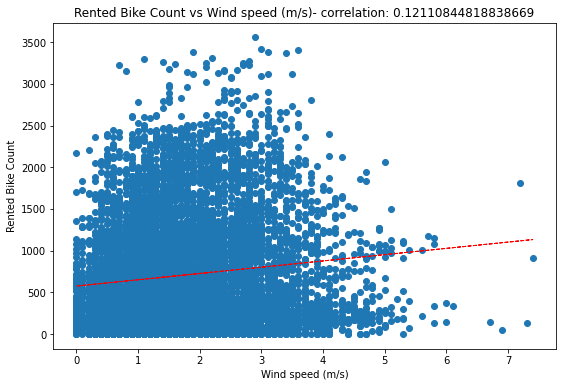

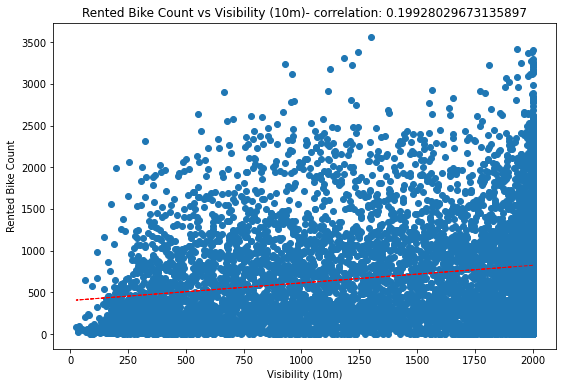

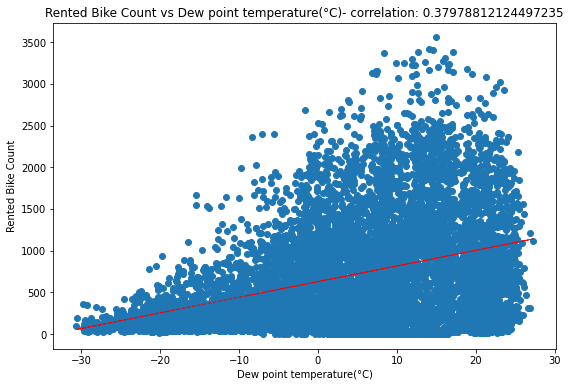

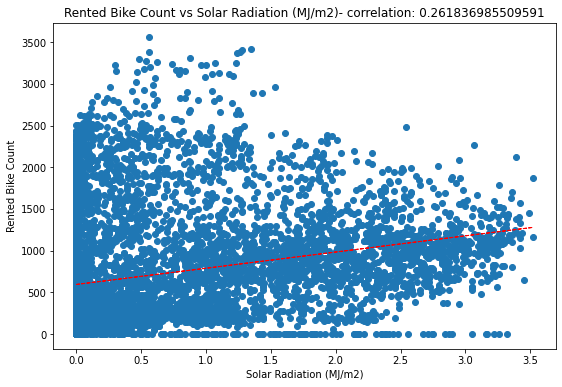

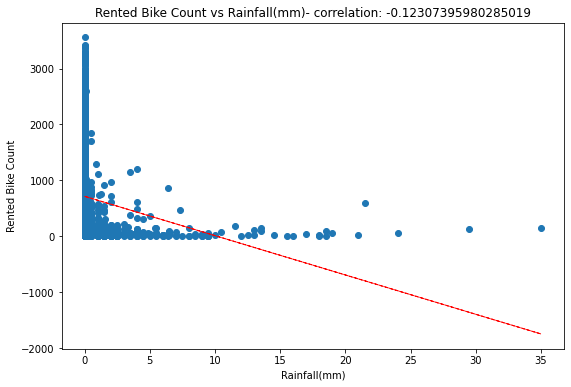

In [32]:
#plotting scatter plots of numerical variables with correlation 
for col in Numerical_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    label = data['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(data[col], data['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(data[col])

    plt.plot(data[col], y_hat, "r--", lw=1)

plt.show()

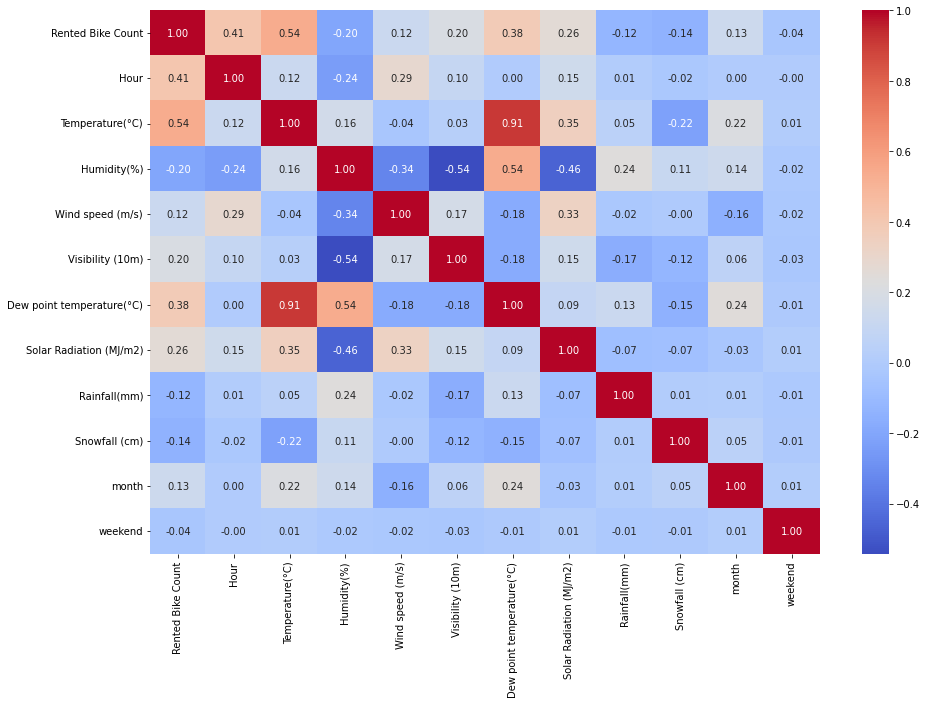

In [33]:
#plotting correlation plot 
corr=data.corr()
fig=plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

From the above scatter plots and heatmap we can that ,


*  Temperature is highly positively correlated with rental bike count target variable
*  Dew point temperature ,solar radiation,visibilty,Wind speed is moderately positively correlated with rental bike count target variable

*   humidity and rainfall are negtively moderately correlated with rental bike count variable 





**Target variable**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


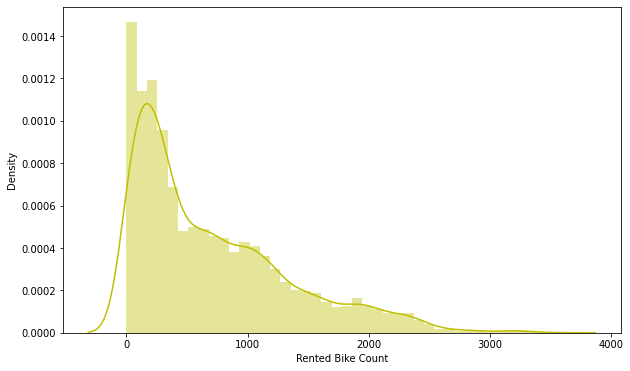

In [34]:
#cheking if target variable follows normal distribution
plt.figure(figsize=(10,6))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
ax=sns.distplot(data['Rented Bike Count'],hist=True ,color="y")
plt.show()

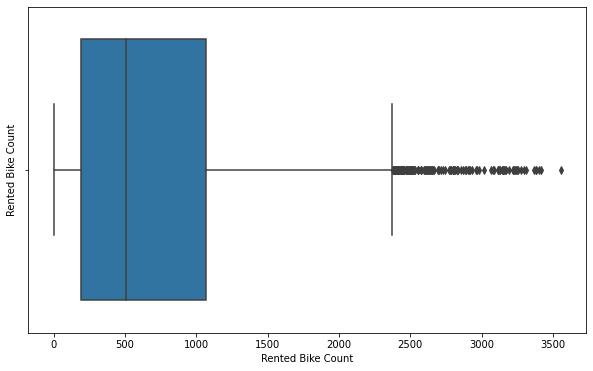

In [35]:
#plotting boxplot of rented bike count to check if outliers are present 
plt.figure(figsize=(10,6))
plt.ylabel('Rented Bike Count')
sns.boxplot(x=data['Rented Bike Count'])
plt.show()

**From above analysis we can say that our target variable is right skewed and contains some outliers .So we wil use take the square root of varible to improve the skewness and approximte it to follow normal distribution.**

In [36]:
#Applying log on rented bike count to normalize variable
#plt.figure(figsize=(10,8))
#plt.xlabel('Rented Bike Count')
#plt.ylabel('Density')
#ax=sns.distplot(np.log10(data['Rented Bike Count']), color="y")
#plt.show()
# it is giving error that OverflowError: cannot convert float infinity to integer

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


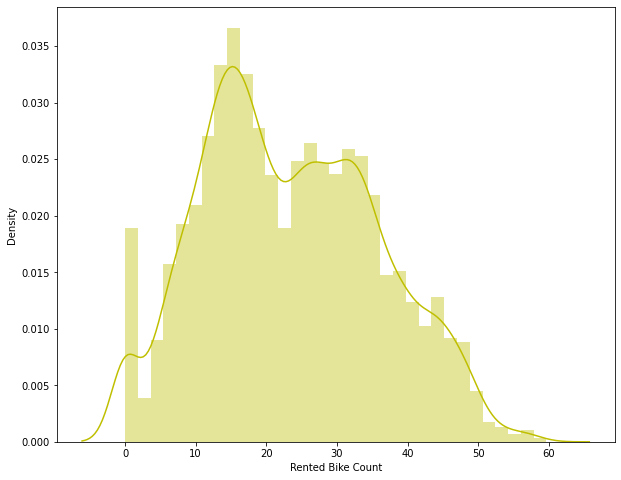

In [37]:
#since we can not apply log on rented bike count because it is showing error that why  i am Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
ax=sns.distplot(np.sqrt(data['Rented Bike Count']), color="y")
plt.show()

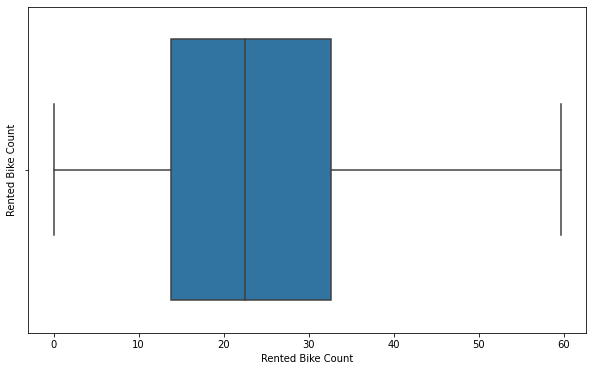

In [38]:
#plotting boxplot of rented bike count after applying square root 
plt.figure(figsize=(10,6))
plt.ylabel('Rented Bike Count')
sns.boxplot(x=np.sqrt(data['Rented Bike Count']))
plt.show()

we can see that after applying square root on rented bike count ,it is approximately following normal distribution 

**Feature engineering**

In [39]:

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Functioning day '.
data['Functioning Day']= label_encoder.fit_transform(data['Functioning Day'])
  
data['Functioning Day'].unique()


array([1, 0])

In [40]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'hoilday'.
data['Holiday']= label_encoder.fit_transform(data['Holiday'])
  
data['Holiday'].unique()

array([1, 0])

In [41]:
#applying dummies on column 'seasons','hour','month'.
data=pd.get_dummies(data,columns=['Seasons','Hour','month'])

In [42]:
data.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1


In [43]:
#defining independent and dependent variables
independent_variables=data.drop('Rented Bike Count',axis=1)
dependent_variable=np.sqrt(data['Rented Bike Count'])

In [44]:
independent_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperature(°C)            8760 non-null   float64
 1   Humidity(%)                8760 non-null   int64  
 2   Wind speed (m/s)           8760 non-null   float64
 3   Visibility (10m)           8760 non-null   int64  
 4   Dew point temperature(°C)  8760 non-null   float64
 5   Solar Radiation (MJ/m2)    8760 non-null   float64
 6   Rainfall(mm)               8760 non-null   float64
 7   Snowfall (cm)              8760 non-null   float64
 8   Holiday                    8760 non-null   int64  
 9   Functioning Day            8760 non-null   int64  
 10  weekend                    8760 non-null   int64  
 11  Seasons_Autumn             8760 non-null   uint8  
 12  Seasons_Spring             8760 non-null   uint8  
 13  Seasons_Summer             8760 non-null   uint8

# ***Validating Assumptions of Linear Regression ***

***Cheking if there is Multicollinearity ***

Multicollinearity is the occurrence of high intercorrelations among two or more independent variables in a multiple regression model. Multicollinearity can lead to skewed or misleading results when a researcher or analyst attempts to determine how well each independent variable can be used most effectively to predict or understand the dependent variable in a statistical model.

In [45]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(independent_variables):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = independent_variables.columns
    vif["VIF"] = [variance_inflation_factor(independent_variables.values, i) for i in range(independent_variables.shape[1])]

    return(vif)

In [46]:
calc_vif(data[[i for i in data.describe().columns if i not in ['Rented Bike Count']]])

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Temperature(°C),99.414837
1,Humidity(%),21.291117
2,Wind speed (m/s),1.427037
3,Visibility (10m),2.315502
4,Dew point temperature(°C),125.975811
5,Solar Radiation (MJ/m2),4.773386
6,Rainfall(mm),1.112387
7,Snowfall (cm),1.144392
8,Holiday,1.044228
9,Functioning Day,1.085811


In [47]:
calc_vif(data[[i for i in data.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)','Hour_1','month_6']]])

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,Temperature(°C),11.240750
1,Humidity(%),3.108108
2,Wind speed (m/s),1.427019
3,Visibility (10m),2.315368
4,Solar Radiation (MJ/m2),4.636086
5,Rainfall(mm),1.096324
6,Snowfall (cm),1.137446
7,Holiday,1.044210
8,Functioning Day,1.084871
9,weekend,1.010891


In [48]:
calc_vif(data[[i for i in data.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)','Hour_1','month_6','month_3','month_4','month_1','month_10','Seasons_Spring']]])

,variables,VIF
0,Temperature(°C),19.823182
1,Humidity(%),17.951514
2,Wind speed (m/s),5.239885
3,Visibility (10m),10.282582
4,Solar Radiation (MJ/m2),6.516898
5,Rainfall(mm),1.109882
6,Snowfall (cm),1.164005
7,Holiday,18.695895
8,Functioning Day,25.029948
9,weekend,1.409854


we can see that multicollinearity has been reduced,therefore we will Removing variables having high multicollinearity.

In [49]:
independent_var=independent_variables.drop(['Dew point temperature(°C)','Hour_1','month_6','month_3','month_4','month_1','month_10','Seasons_Spring'],axis=1)
independent_var.shape

(8760, 43)

# ***Multiple linear regression ***

Multiple linear regression (MLR), also known simply as multiple regression, is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. Multiple regression is an extension of linear (OLS) regression that uses just one explanatory variable

**Assumptions** :

There must be a linear relationship between the outcome variable and the independent variables.  Scatterplots can show whether there is a linear or curvilinear relationship.

Multivariate Normality–Multiple regression assumes that the residuals are normally distributed.

No Multicollinearity—Multiple regression assumes that the independent variables are not highly correlated with each other.  This assumption is tested using Variance Inflation Factor (VIF) values.

***performing train test split ***

Train test split is a model validation procedure that allows you to simulate how a model would perform on new/unseen data.

In [50]:
#performing train test split on independent and dependent variables 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split( independent_var,dependent_variable , test_size = 0.2,random_state =0) 
print(x_train.shape)
print(x_test.shape)

(7008, 43)
(1752, 43)


In [51]:
#fitting multiple linear regression model 
from sklearn.linear_model import LinearRegression

mlr = LinearRegression().fit(x_train, y_train)

In [52]:
mlr.score(x_train, y_train)

0.7743987734371468

In [53]:
#getting predicted values of y train and y test 
y_train_pred = mlr.predict(x_train)
y_test_pred = mlr.predict(x_test)

In [54]:
from sklearn.metrics import r2_score

In [55]:
#Getting r2 score for test set 
r2score=r2_score(y_test, y_test_pred)
r2score

0.784707129852672

In [56]:
#calculating resuduals for training and testing set 
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

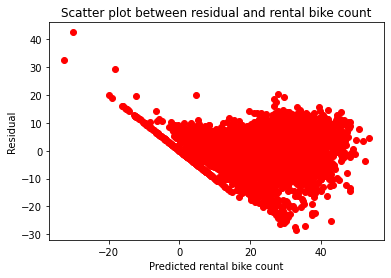

In [57]:
#  Plotting scatter plot between residual and fitted values
plt.scatter(y_train_pred, residuals_train,c='red')
plt.title('Scatter plot between residual and rental bike count')
plt.xlabel('Predicted rental bike count')
plt.ylabel('Residual')
plt.show()

From above plot we can say that there is no heteroscedasticity prent in data 

In [58]:
#calculating mean of residual 
round((np.mean(residuals_train)))

0

The mean of residuals is zero .therfore all the assumptions of multiple linear regression model are satisfied .

In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from numpy import math


# **Evaluation metrics for regression models**


***R squared ***

R-Squared is a statistical measure of fit that indicates how much variation of a dependent variable is explained by the independent variable(s) in a regression model.

**Mean squared error** 

Mean squared error (MSE) measures the amount of error in statistical models. It assesses the average squared difference between the observed and predicted values. 

**Root Mean Square Error (RMSE)**

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are.

**mean absolute error (MAE)**

mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon. Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one technique of measurement versus an alternative technique of measurement.

**Adjusted R squared**
Adjusted R squared is calculated by dividing the residual mean square error by the total mean square error (which is the sample variance of the target field). The result is then subtracted from 1. Adjusted R2 is always less than or equal to R2.


In [60]:
#defining a fuction to find the evaluation metrics of the model
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('R2_score is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('Adj_R2_score is {}'.format(1-(1-r2score)*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))))

In [61]:
#Training_dataset_metrics
print_metrics(y_train, y_train_pred)

MSE is 34.817741769952825
RMSE is 5.900656045725155
R2_score is 0.7743987734371468
MAE is 4.4639451242331765
Adj_R2_score is 0.7792869931920543


In [62]:
#Test_dataset_metrics
print_metrics(y_test, y_test_pred)

MSE is 33.905668316490555
RMSE is 5.822857401352927
R2_score is 0.784707129852672
MAE is 4.444111348257234
Adj_R2_score is 0.7792869931920543


*** The r2 score for training set is 0.77 and  the r2_score for the test set is 0.78 This means our linear regression model is performing well on the data. ***

# **Lasso regression**

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

In [63]:
# Fitting the Lasso model
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
lasso.fit(x_train, y_train)

Lasso(max_iter=3000)

In [64]:
#getting the predicted values of  y_train and y-test 
y_pred_train_lasso=lasso.predict(x_train)
y_pred_test_lasso=lasso.predict(x_test)

In [65]:
r2score_lasso=r2_score(y_test, y_pred_test_lasso)

In [66]:
#defining a fuction to find the evaluation metrics of the model
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('R2_score is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('Adj_R2_score is {}'.format(1-(1-r2score_lasso)*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))))

In [67]:
# Training dataset metrics
print_metrics(y_train, y_pred_train_lasso)

MSE is 91.85465398123709
RMSE is 9.584083366772072
R2_score is 0.4048286433798308
MAE is 7.267171202255601
Adj_R2_score is 0.3681798790716583


In [68]:
# Testing  dataset metrics
print_metrics(y_test, y_pred_test_lasso)

MSE is 97.05945184518272
RMSE is 9.851875549619104
R2_score is 0.38369573583917327
MAE is 7.4573120369945896
Adj_R2_score is 0.3681798790716583


***The r2_score for the test set is 0.38 . This means our lasso regression model is not performing well on the data. ***

In [69]:
from sklearn.model_selection import GridSearchCV

**cross validation** 

Cross-validation is a technique for validating the model efficiency by training it on the subset of input data and testing on previously unseen subset of the input data. We can also say that it is a technique to check how a statistical model generalizes to an independent dataset.

**hyperparameter tunning**

Hyperparameter tuning is the process of tuning the parameters present as the tuples while we build machine learning models. These parameters are defined by us which can be manipulated according to programmer wish. Machine learning algorithms never learn these parameters. These are tuned so that we could get good performance by the model.


In [70]:
### performing Cross validation and hyperparameter tunning 
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.081e+04, tolerance: 7.250e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.932e+04, tolerance: 7.234e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [71]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -35.3987974366096


In [72]:
#getting predicted value of y test
y_pred_lasso = lasso_regressor.predict(x_test)

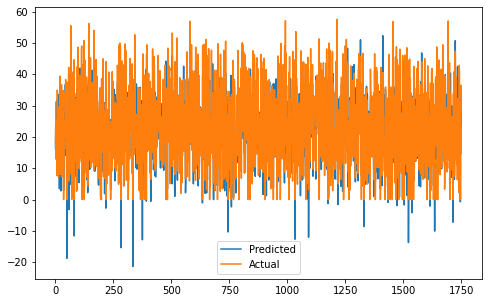

In [73]:
#plotting predicted v/s actual plot
plt.figure(figsize=(8,5))
plt.plot((y_pred_lasso))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [74]:
#getting evaluation metrics of the model 
MSE  = mean_squared_error((y_test), (y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred_lasso)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 33.91094156718748
RMSE : 5.8233101898479935
R2 : 0.7846736459741962
Adjusted R2 :  0.7792526663353733


***The R2_score for test set after hyperparameters tunning is 0.78 .This means our lasso regression model is performing well on the data. ***

# **RIDGE REGRESSION**

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values.

In [75]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [76]:
ridge= Ridge(alpha=0.1)

In [77]:
#fitting ridge regression
ridge.fit(x_train,y_train)


Ridge(alpha=0.1)

In [78]:
#getting the predicted  y_train and y-test value
y_pred_train_ridge=ridge.predict(x_train)
y_pred_test_ridge=ridge.predict(x_test)

In [79]:
r2score_ridge=r2_score(y_test, y_pred_test_ridge)

In [80]:
#defining a fuction to find the evaluation metrics of the model
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('R2_score is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('adj_r2_score is {}'.format(1-(1-r2score_ridge)*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))))

In [81]:
# Training dataset metrics
print_metrics(y_train, y_pred_train_ridge)

MSE is 34.81776234567281
RMSE is 5.900657789236113
R2_score is 0.7743986401169649
MAE is 4.464062543032918
adj_r2_score is 0.7792742823039116


In [82]:
# testing  dataset metrics
print_metrics(y_test, y_pred_test_ridge)

MSE is 33.90762094793536
RMSE is 5.823025068461869
R2_score is 0.7846947311108401
MAE is 4.444422895352889
adj_r2_score is 0.7792742823039116


***The r2_score for the test set is 0.78  This means our ridge regression model is performing well on the data. ***

In [83]:
#performing cross validation and hyperparameter tunning on ridge regression
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [84]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -35.40015138670564


In [85]:
#getting  Predicted values on y test
y_pred_ridge = ridge_regressor.predict(x_test)

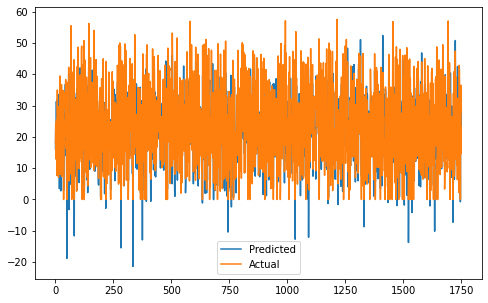

In [86]:
#plotting predicted v/s actual plot
plt.figure(figsize=(8,5))
plt.plot((y_pred_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [87]:
#defining a fuction to find the evaluation metrics of the model
MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_ridge)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 33.90586231679181
RMSE : 5.822874059842941
R2 : 0.7847058979972407
Adjusted R2 :  0.7792857303238692


***The r2_score for the test set after hyperparameter tunnig is 0.78 This means our ridge regression model is performing well on the data. ***

# **Elastic net regression**

Elastic net is a popular type of regularized linear regression that combines two popular penalties, specifically the L1 and L2 penalty functions

In [88]:
#import the packages
from sklearn.linear_model import ElasticNet
elastic_net_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [89]:
#fitting elastic net regression model
elastic_net_reg.fit(x_train,y_train)

ElasticNet(alpha=0.1)

In [90]:
#getting the predicted values of y train and y test 
y_pred_train_el=elastic_net_reg.predict(x_train)
y_pred_test_el=elastic_net_reg.predict(x_test)

In [91]:
r2score_el=r2_score(y_test, y_pred_test_el)

In [92]:
#getting evaluation metrics of the model 
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('R2_score is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('Adj_R2_score is {}'.format(1-(1-r2score_el)*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))))

In [93]:
# Training dataset metrics
print_metrics(y_train, y_pred_train_el)

MSE is 58.44799286228148
RMSE is 7.645128701485769
R2_score is 0.6212867862887405
MAE is 5.8264410123812
Adj_R2_score is 0.6047665429467163


In [94]:
# Testing dataset metrics
print_metrics(y_test, y_pred_test_el)

MSE is 60.71529130174544
RMSE is 7.792001751908519
R2_score is 0.6144724473746381
MAE is 5.9027708550477564
Adj_R2_score is 0.6047665429467163


**The r2_score for the test set is 0.61 . This means our elastic net regression  model is performing well on the data.** 

In [95]:
#performing cross validation and hyperparameter tunning of elastic net regression model
el = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(el, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.667e+04, tolerance: 8.747e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.484e+04, tolerance: 8.603e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [96]:
y_pred_elastic = elastic_regressor.predict(x_test)

In [97]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001, 'l1_ratio': 0.4}

Using  {'alpha': 0.0001, 'l1_ratio': 0.4}  the negative mean squared error is:  -35.42970614067199


In [98]:
#getting evaluation metrics of the model 
MSE  = mean_squared_error((y_test),(y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_elastic)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 33.91417832175735
RMSE : 5.823588096848655
R2 : 0.784653093358191
Adjusted R2 :  0.7792315962940237


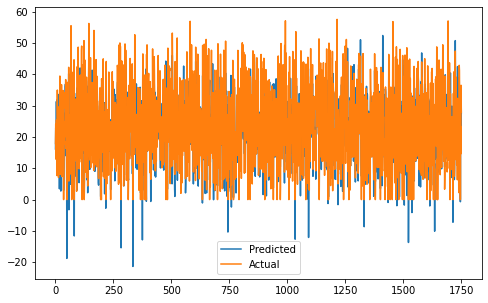

In [99]:
#plotting predicted v/s actual plot
plt.figure(figsize=(8,5))
plt.plot((y_pred_elastic))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

**The r2_score for the test set after hyperparameter tunning is 0.78. This means our elastic net regression model is performing well on the data.**


# **DECISION TREE**
Decision Tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart-like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. 

In [ ]:
from sklearn.model_selection import train_test_split 
x_train1, x_test1, y_train1, y_test1 = train_test_split( independent_variables,dependent_variable , test_size = 0.2,random_state=0) 
print(x_train1.shape)
print(x_test1.shape)

(7008, 51)
(1752, 51)


In [ ]:
#fitting decision tree model 
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(x_train1, y_train1)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [ ]:
#get the predicted values of y train and y test
y_pred_train_dt = decision_regressor.predict(x_train1)
y_pred_test_dt = decision_regressor.predict(x_test1)

In [ ]:
r2score_dt=r2_score(y_test1, y_pred_test_dt)

In [ ]:
##getting evaluation metrics of the model 
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('R2_score is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('Adj_R2_score is {}'.format(1-(1-r2score_dt)*((x_test1.shape[0]-1)/(x_test1.shape[0]-x_test1.shape[1]-1))))

In [ ]:
#Training data metrics 
print_metrics(y_train1, y_pred_train_dt)

MSE is 52.51295724969597
RMSE is 7.246582453108222
R2_score is 0.6597427930780435
MAE is 5.133316266380974
Adj_R2_score is 0.38165206870013346


In [ ]:
#Testing data metrics 
print_metrics(y_test1, y_pred_test_dt)


MSE is 54.77691321467142
RMSE is 7.401142696548379
R2_score is 0.6521797254159428
MAE is 5.342137891169419
Adj_R2_score is 0.38165206870013346


***The r2_score for the test set is 0.66 . This means our Decision Tree  model is performing well on the data. ***

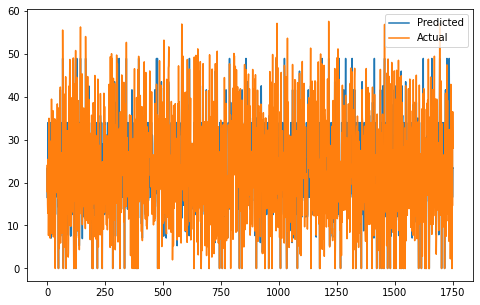

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_test_dt))
plt.plot((np.array(y_test1)))
plt.legend(["Predicted","Actual"])
plt.show()

# **RANDOM FOREST**

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model

In [ ]:
#importing the packages
from sklearn.ensemble import RandomForestRegressor
#Fitting random forest model 
rf_model = RandomForestRegressor()

rf_model.fit(x_train1,y_train1)

RandomForestRegressor()

In [ ]:
# getting predicted values of y train and y test

y_pred_train_rf = rf_model.predict(x_train1)
y_pred_test_rf = rf_model.predict(x_test1)

In [ ]:
r2score_rf=r2_score(y_test1, y_pred_test_rf)

In [ ]:
#fuction for evaluation metrice of models
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('R2_score is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('Adj_R2_score is {}'.format(1-(1-r2score_rf)*((x_test1.shape[0]-1)/(x_test1.shape[0]-x_test1.shape[1]-1))))

In [ ]:
#Training data metrics 
print_metrics(y_train1, y_pred_train_rf)

MSE is 1.5603016966938077
RMSE is 1.2491203691773693
R2_score is 0.9898900400000669
MAE is 0.7839264771527887
Adj_R2_score is 0.9185181327717464


In [ ]:
#Testinf data metrics 
print_metrics(y_test1, y_pred_test_rf)

MSE is 12.458518735540261
RMSE is 3.5296626943010097
R2_score is 0.9208913910405305
MAE is 2.1903766546083574
Adj_R2_score is 0.9185181327717464


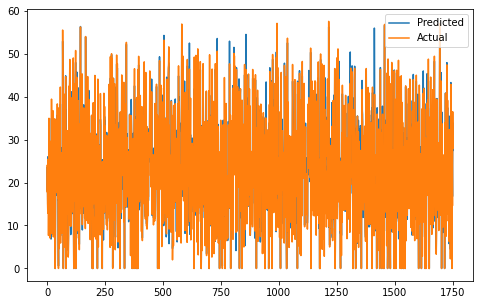

In [ ]:
#plotting predicted v/s actual plot 
plt.figure(figsize=(8,5))
plt.plot((y_pred_test_rf))
plt.plot((np.array(y_test1)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
rf_model.feature_importances_

array([3.11148971e-01, 1.47534266e-01, 1.05974442e-02, 1.04916964e-02,
       1.95734863e-02, 2.89240963e-02, 3.07441216e-02, 1.44482616e-03,
       4.03256492e-03, 1.51433140e-01, 1.84487332e-02, 1.29186022e-02,
       1.99257276e-03, 7.93869949e-04, 5.62351985e-03, 2.89837916e-03,
       5.56414552e-03, 1.40863692e-02, 2.08154716e-02, 3.10209341e-02,
       2.73132988e-02, 8.65571259e-03, 4.23791204e-03, 1.37519465e-02,
       8.75055381e-04, 2.05802862e-03, 1.02339862e-03, 2.37701340e-04,
       2.31442124e-04, 3.12566368e-04, 1.25645446e-03, 3.14629746e-03,
       1.00649245e-02, 3.28240068e-02, 1.55741939e-02, 1.06392413e-02,
       1.05723361e-02, 8.20395321e-03, 3.72049704e-03, 1.78602245e-04,
       2.27539818e-04, 3.82627442e-03, 1.08875831e-03, 1.25682310e-03,
       1.86261264e-03, 5.31473801e-04, 1.45317540e-03, 6.59964392e-04,
       2.08308757e-03, 1.31760888e-03, 7.27901398e-04])

In [ ]:
#finding important factors 
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(x_train1.columns),
                   'Feature Importance' : importances}

In [ ]:
importance_df = pd.DataFrame(importance_dict)

In [ ]:
#Top 10 most important factors according to random forest model
importance_df.sort_values(by=['Feature Importance'],ascending=False).head(10)

,Feature,Feature Importance
0,Temperature(°C),0.311149
9,Functioning Day,0.151433
1,Humidity(%),0.147534
33,Hour_18,0.032824
19,Hour_4,0.031021
6,Rainfall(mm),0.030744
5,Solar Radiation (MJ/m2),0.028924
20,Hour_5,0.027313
18,Hour_3,0.020815
4,Dew point temperature(°C),0.019573


***The r2_score for the test set is 0.92 . This means our Random forest  model is performing very well on the data. ***

# **Conclusions :**


1.   From exploratory data anlysis of the given data we can see that 


*  The maximum number of bikes rented in the month of June and followed by May ,july,August,september and october .
*  The people rent bikes slightly more bikes in weekdays as compared to weekend 


*   peak time of renting bike at 7am to 9am in the morning and from 5pm to 10pm in the evening .People mostly use the rental bikes to go their workplace so that's  why company should increase the availabilty of the bikes during the peak hours.
*  In summer season the use of rented bike is high and In winter season the use of rented bike is very low because of snowfall .

2.  From the scatter plots we can that ,

*   Temperature is highly positively correlated with rental bike count target 
variable.people prefer renting bike when the temperature normal not to hot and not too cold outside
*  Dew point temperature ,solar radiation,visibilty,Wind speed is moderately positively correlated with rental bike count target variable

*   humidity and rainfall are negtively moderately correlated with rental bike count variable.people does not prefer to rent when there is raining outside.

3.  Prediction model insights : 


*   I implemented 6 machine learning algorithms Linear regression  ,lasso regression ,ridge regression ,elasticnet regression ,decission tree, Random Forest .
 The results of our evaluation are:

 1)The r2_score for the test set is 0.78 . This means our linear regression model is performing well on the data.

 2)The r2_score for the test set is 0.38 for lasso regression . This means our lasso regression model is not performing well on the data.

 3)The r2_score for the test set is 0.78 This means our ridge regression model is performing well on the data.

 4)The r2_score for the test set is 0.61 . This means our elastic net regression model is performing well on the data.

 5)The r2_score for the test set is 0.66 . This means our Decision Tree model is performing well on the data.

 6)The r2_score for the test set is 0.92 . This means our Random forest model is performing very well on the data.

 i also performed hyperparameter tunning on lasso,ridge and elastic net regression ,

 a)The R2_score after hyperparameters tunning is 0.78 .This means our lasso regression model is performing well on the data.

 b)The r2_score for the test set after hyperparameter tunnig is 0.78 This means our ridge regression model is performing well on the data. 

 c)The r2_score for the test set after hyperparameter tunning is 0.78. This means our elastic net regression model is performing well on the data. 





*   The Random forest model is giving the highest r2_score among all the models so we can deploy this model for prediction.according to random forest model the most important  10 features are  temperature, functioning day,humidity,rainfall,solar radiation,hour_18 ,hour_4 ,hour_5,hour_3 means 6pm 4am 5am 3am respectively and dew point temperature.








 








